## 1.12 Multiclass and multioutput algorithm

This section covers functionality related to multi-learning problems, including:
* **multiclass**
* **multilabel**
* **multioutput**

The modules here implement **meta-estimators**, which require a base estimator to be provided in their constructor. Meta-estimators extend the functionality of the base estimator to support multi-learning problems, accomplished by transforming the multi-learning problem into a set of simpler problems, then fitting one estimator per problem

**Inherently multiclass**:
* `discriminant_analysis.LinearDiscriminantAnalysis`
* `discriminant_analysis.QuadraticDiscriminantAnalysis`
* `ensemble.ExtraTreesClassifier`
* `ensemble.RandomForestClassifier`
* `linear_model.LogisticRegression` (setting `multi_class='multinomial'`)
* `linear_model.LogisticRegressionCV` (setting `multi_class='multinomial'`)
* `linear_model.RidgeClassifier`
* `linear_model.RidgeClassifierCV`* `naive_bayes.BernoulliNB`
* `naive_bayes.GaussianNB`
* `neighbors.NearestCentroid`
* `neighbors.KNeighborsClassifier`
* `neighbors.RadiusNeighborsClassifier`
* `neural_network.MLPClassifier`
* `semi_supervised.LabelPropagation`
* `semi_supervised.LabelSpreading`
* `svm.LinearSVC` (setting `multi_class='crammer_singer'`)
* `tree.DecisionTreeClassifier`
* `tree.ExtraTreeClassifier`

**Multiclass as One-Vs-One**
* `gaussian_process.GaussianProcessClassifier` (setting `multi_class='one_vs_one'`)
* `svm.NuSVC`
* `svm.SVC`

**Multiclass as One-Vs-The-Rest**
* `ensemble.GradientBoostingClassifier`
* `gaussian_process.GaussianProcessClassifier` (setting `multi_class='one_vs_rest'`)
* `linear_model.LogisticRegression` (setting `multi_class='ovr'`)
* `linear_model.LogisticRegressionCV` (setting `multi_class='ovr'`)
* `linear_model.PassiveAggressiveClassifier`
* `linear_model.Perceptron`
* `linear_model.SGDClassifier`
* `svm.LinearSVC` (setting `multi_class='ovr'`)

**Support multilabel**
* `ensemble.ExtraTreesClassifier`
* `ensemble.RandomForestClassifier`
* `linear_model.RidgeClassifier`
* `linear_model.RidgeClassifierCV`
* `neighbors.KNeighborsClassifier`
* `neighbors.RadiusNeighborsClassifier`
* `neural_network.MLPClassifier`
* `tree.DecisionTreeClassifier`
* `tree.ExtraTreeClassifier`

**Support multiclass-multioutput**
* `ensemble.ExtraTreesClassifier`
* `ensemble.RandomForestClassifier`
* `neighbors.KNeighborsClassifier`
* `neighbors.RadiusNeighborsClassifier`
* `tree.DecisionTreeClassifier`
* `tree.ExtraTreeClassifier`

### 1.12.1 Multiclass classification

**Multiclass classification** is a classification task with more than two classes, and each sample can only be labeled as one class. While all scikit-learn classifiers are capable of multiclass classification, the meta-estimators offered by `sklearn.multiclass` permit changing the way they handle more than two classes because it may have an effect on classifier performance--whether errors or complexity

#### 1.12.1.1 Target format

Valid multiclass representations for `type_of_target(y)` are:
* 1D or column vectors containing more than 2 discrete values
* Dense or sparse binary matrix of shape (`n_samples`, `n_classes`)

#### 1.12.1.2 OneVsRestClassifier

The **one-vs-rest** strategy (or **one-vs-all**) is implemented in `OneVsRestClassifier` and consists of fitting one classifier per class. For each classifier, the class is fitted against all the other classes.

Computation efficiency: only `n_classes` classifiers are needed

Interpretability: each class is represented by one and only one classifier

Example:

In [1]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [2]:
X, y = datasets.load_iris(return_X_y=True)

example_classifier = OneVsRestClassifier(LinearSVC(random_state=0))
example_classifier.fit(X,y)
example_classifier.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

###### Example - Multilabel classification
https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multilabel.html#sphx-glr-auto-examples-miscellaneous-plot-multilabel-py

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

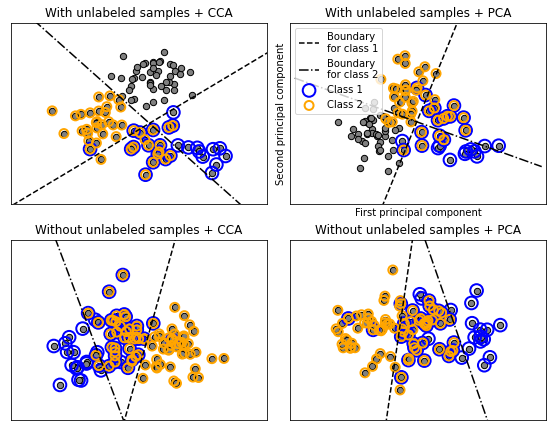

In [4]:
#COPYPASTA
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel="linear"))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c="gray", edgecolors=(0, 0, 0))
    plt.scatter(
        X[zero_class, 0],
        X[zero_class, 1],
        s=160,
        edgecolors="b",
        facecolors="none",
        linewidths=2,
        label="Class 1",
    )
    plt.scatter(
        X[one_class, 0],
        X[one_class, 1],
        s=80,
        edgecolors="orange",
        facecolors="none",
        linewidths=2,
        label="Class 2",
    )

    plot_hyperplane(
        classif.estimators_[0], min_x, max_x, "k--", "Boundary\nfor class 1"
    )
    plot_hyperplane(
        classif.estimators_[1], min_x, max_x, "k-.", "Boundary\nfor class 2"
    )
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - 0.5 * max_x, max_x + 0.5 * max_x)
    plt.ylim(min_y - 0.5 * max_y, max_y + 0.5 * max_y)
    if subplot == 2:
        plt.xlabel("First principal component")
        plt.ylabel("Second principal component")
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=True, random_state=1
)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=False, random_state=1
)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(0.04, 0.02, 0.97, 0.94, 0.09, 0.2)
plt.show()

##### 1.12.1.3 OneVsOneClassifier

The `OneVsOneClassifier` algorithm constructs one classifier per pair of classes. At prediction time, the class with the most votes is selected--and a tie is decided by the highest aggregate classification confidence (summing over pair-wise classification confidence levels)

**One-vs-one** is usually slower than **one-vs-rest** but it may have advantage for algorithms which don't scale well with `n_samples` like kernel algorithms. This is because each individual learning problem only involves a small subset of the data, and the decision function is the result of a monotonic transformation of the one-vs-one classification

Example:

In [5]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [6]:
X, y = datasets.load_iris(return_X_y=True)

OneVsOneClassifier(LinearSVC(random_state=0)).fit(X,y).predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 1.12.1.4 OutputCodeClassifier

*Error-Correcting Output Code*-based strategies represent each class in a Euclidean space where each dimension can either be $0$ or $1$. The matrix which keeps track of the location (code) of each class is called the **code book**, and the **code size** is the dimensionality of that space.

Each class should be represented by a code as unique as possible and a good code book should optimize classification accuracy.

At fitting, one binary classifier per bit in the code book is fitted. At prediction, the classifiers are used to project new points in the class space and the class closest to the points is chosen.

In `OutputCodeClassifier` the `code_size` attribute lets you control the number (percentage) of classifiers. A number between 0 and 1 requires fewer classifiers than one-vs-rest, and a number greater than 1 requires more classifiers. In the latter case, some classifiers will "correct" mistakes made by other classifiers (hence why it's *error-correcting*)

Example:

In [7]:
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC

In [8]:
X, y = datasets.load_iris(return_X_y=True)

clf = OutputCodeClassifier(LinearSVC(random_state=0), code_size=2, random_state=0)

clf.fit(X,y).predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 1.12.2 Multilabel classification

**Multilabel classification**, closely related to **multioutput classification**, is a classification task labeling each sample with $m$ labels from `n_classes`, where $0 < m \leq$ `n_classes`

This is akin to predicting properties that are not mutually exclusive. For example, a video may be categorized as 'religion' or 'politics' or 'education' or several of those topics.

#### 1.12.2.1 Target format

A valid representation of the multilabel $y$ is a dense or sparse matrix of shape (`n_samples`,`n_classes`)

#### 1.12.2.2 MultiOutputClassifier

Multilabel classification support can be added to any classifier with `MultiOutputClassifier`, a strategy that consists of fitting one classifier per target and allows multiple target variable classifications. The purpose is to extend estimators to be able to estimate a series of target functions $(f_{1},f_{2},f_{3},...,f_{n})$ that are trained on a single $X$ predictor matrix to predict $(y_{1},y_{2},y_{3},...y_{n})$

Example:

In [15]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [19]:
X, y1 = make_classification(n_samples=10,n_features=100, n_informative=30, 
                            n_classes=3, random_state=1)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)

Y = np.vstack((y1,y2,y3)).T

In [20]:
n_samples, n_features = X.shape #10, 100
n_outputs = Y.shape[1] #3
n_classes = 3

In [21]:
forest = RandomForestClassifier(random_state=1)

multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X,Y).predict(X)

array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])

#### 1.12.2.3 ClassifierChain

**Classifier chains** are a way to combine multiple binary classifiers into a single multi-label model that is capable of exploiting correlations among targets

The true labels are not available when predicting. Instead the predictions of each model are passed to the subsequent models in the chain to be used as features

The order of the chain is important, because the first model has no information about the other labels and the last model in the chain has features indicating the presence of all the other labels. In general you won't know the optimal ordering of models, so typically many randomly ordered chains are fit and their predictions averaged together

### 1.12.3 Multiclass-multioutput classification

**Multiclass-multioutput classification** (also known as **multitask classification**) is a classification task which labels each sample with a set of **non-binary** properties, where both the number of properties and number of classes per property is greater than 2. This is both a generalization of the multi*label* classification task (which only considers binary attributes) as well as the multi*class* classification task (where only one property is considered)

For example, classification of the properties *types of fruit* and *color* for a set of images of fruit. The property *type of fruit* has classes like "apple", "pear", "orange" and so on. The property "color" has classes like "green", "yellow", "red", and so on

All classifiers handling multitask classification tasks support the multilabel classification as a special case. It's similar to multioutput classification with different model formulations

###### **Note: at present, no metric in sklearn.metrics supports the multitask classification task**

#### 1.12.3.1 Target format

### 1.12.4 Multioutput regression

Multioutput regression is the regressor form of the classifer above

#### 1.12.4.1 Target format

#### 1.12.4.2 MultiOutputRegressor

Example:

In [22]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
X, y = make_regression(n_samples=10, n_targets=3, random_state=1)

In [24]:
MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X,y).predict(X)

array([[-154.75474165, -147.03498585,  -50.03812219],
       [   7.12165031,    5.12914884,  -81.46081961],
       [-187.8948621 , -100.44373091,   13.88978285],
       [-141.62745778,   95.02891072, -191.48204257],
       [  97.03260883,  165.34867495,  139.52003279],
       [ 123.92529176,   21.25719016,   -7.84253   ],
       [-122.25193977,  -85.16443186, -107.12274212],
       [ -30.170388  ,  -94.80956739,   12.16979946],
       [ 140.72667194,  176.50941682,  -17.50447799],
       [ 149.37967282,  -81.15699552,   -5.72850319]])

#### 1.12.4.3 RegressorChain

**Regressor chains** as analgous to classifier chains as a way to combine a number of regressions into a single multi-target model capable of exploiting correlations among targets